In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

### Define utility functions

In [8]:
def create_data(size = 10000):

    w1_true = 2
    w2_true = 2
    np.random.seed(0)
    X = np.random.rand(size, 2)

    y = w1_true*X[:,0] + w2_true*X[:,1]
    
    return X, y, w1_true, w2_true

def create_data2(size = 10000):
    np.random.seed(0)
    w1_true = 2
    w2_true = 2
    X = np.random.rand(size, 2)

    y = w1_true**3*X[:,0] - w1_true*w2_true**2*X[:,1]
    
    return X, y, w1_true, w2_true

create_data creates a set where $y = w_1x_1 + w_2x_2$ <br>
create_data2 creates a set where $y = w_1^3x_1 + w_1w_2^2x_2$

In [9]:
def forward(w1, w2, X):
    
    return w1*X[:,0] + w2*X[:,1]

def forward2(w1, w2, X):
    
    return w1**3*X[:,0] - w1*w2**2*X[:,1]

In [10]:
def compute_gradient(y_true, X, w1, w2):
    
    y_pred = forward(w1, w2, X)
    E = y_true - y_pred
    
    dw1 = np.mean(-E*X[:,0])
    dw2 = np.mean(-E*X[:,1])
    
    return dw1,dw2

def compute_gradient2(y_true, X, w1, w2):
    
    y_pred = forward2(w1, w2, X)
    E = y_true - y_pred
    
    dw1 = np.mean(E*(-3*w1**2*X[:,0] + w2**2*X[:,1]))
    dw2 = np.mean(E*2*w1*w2*X[:,1])
    
    return dw1,dw2

In [11]:
def get_batch(X, y, start_index, batch_size):
    
    X_batch = X[start_index:(start_index + batch_size), :]
    y_batch = y[start_index:(start_index + batch_size)]
    
    return X_batch, y_batch

### Gradient Equations and Update Rule
$\hat{y_i} = w_1x_{i1} + w_2x_{i2}$
<br>
$L = \frac{1}{2} \sum_i (y_i - \hat{y}_i)^2$ 
<br>

repeat:

$\frac{\partial{L}}{\partial{w_1}} = -\sum_i (y_i - \hat{y_i})x_{i1}$
<br>
$\frac{\partial{L}}{\partial{w_2}} = -\sum_i (y_i - \hat{y_i})x_{i2}$

$w_1^{(t+1)} = w_1^{(t)} - \alpha \frac{\partial{L}}{\partial{w_1}}$ 
<br>
$w_2^{(t+1)} = w_2^{(t)} - \alpha \frac{\partial{L}}{\partial{w_2}}$

In [12]:
def train(X, y, batch_size = 100, lr = 0.001, epochs = 2, w1_init = -8, w2_init = -8):
    
    w1 = w1_init
    w2 = w2_init
    print('initial parameter values:', 'w1:' , w1, 'w2:', w2)
    
    w1_path = [w1]
    w2_path = [w2]
    
    data_size = len(y)
    errors = []
    param_path = []

    for i in range(epochs):
        
        start_index = 0
        batch_errors = 0
        while start_index < data_size :
            
            X_batch, y_batch = get_batch(X, y, start_index, batch_size)
            y_pred = forward(w1, w2, X_batch)
            dw1, dw2 = compute_gradient(y_batch, X_batch, w1, w2)

            w1 += -lr*dw1
            w2 += -lr*dw2
            
            w1_path.append(w1)
            w2_path.append(w2)

            batch_errors += np.sum((y_batch - y_pred)**2)/data_size

            start_index = start_index + batch_size
            
        errors.append(batch_errors)
    
    print('parameter values after training:', 'w1:' , w1, 'w2:', w2)
    return errors, w1, w2, w1_path, w2_path

### Create the data and do the training

initial parameter values: w1: -8 w2: -8
parameter values after training: w1: 1.9999999920661626 w2: 2.000000008214871
initial parameter values: w1: -8 w2: -8
parameter values after training: w1: 2.076859482749021 w2: 1.864803482489338


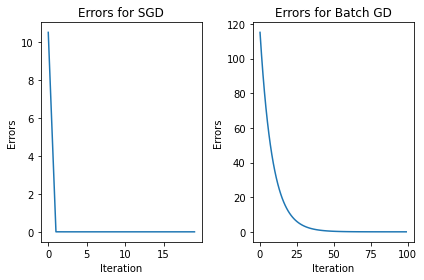

In [13]:
X, y, w1_true, w2_true = create_data(size = 100)

errors, w1, w2, w1_path, w2_path = train(X, y, batch_size = 1, lr = 0.1, epochs = 20, w1_init = -8, w2_init = -8)

errors_batch, w1, w2, w1_path_batch, w2_path_batch = train(X, y, batch_size = 100, lr = 0.1, 
                                                           epochs = 100, w1_init = -8, w2_init = -8)

def plot_errors():
    plt.subplot(1, 2, 1)

    plt.title('Errors for SGD')
    plt.xlabel('Iteration')
    plt.ylabel('Errors')
    plt.plot(errors)

    plt.subplot(1, 2, 2)

    plt.title('Errors for Batch GD')
    plt.xlabel('Iteration')
    plt.ylabel('Errors')
    plt.plot(errors_batch)

    plt.tight_layout()
    plt.show()

plot_errors()

### Take a look at the error surface

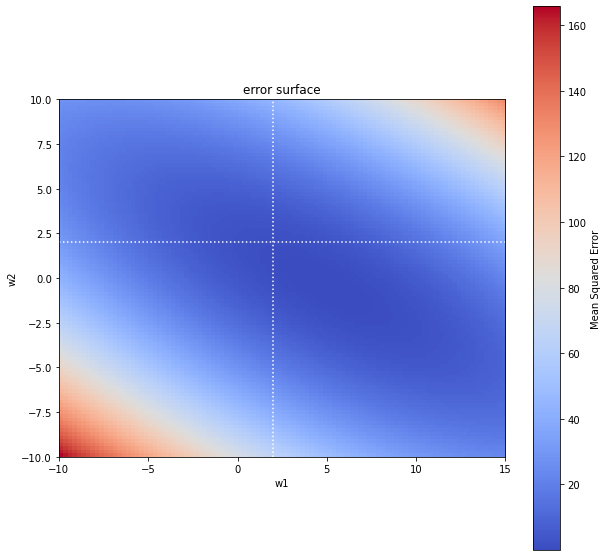

In [14]:
def plot_error_surface(x_left = -10, x_right = 10, y_down = -10, y_up = 10, dataset = 1):
    
    w1_grid = np.linspace(x_left, x_right,100)
    w2_grid = np.linspace(y_down, y_up,100)

    EE = np.zeros((len(w1_grid),len(w2_grid)))

    for i,w1 in enumerate(w1_grid):
        for j,w2 in enumerate(w2_grid):
            if dataset == 1:
                y_preds = forward(w1, w2, X)
            else:
                y_preds = forward2(w1, w2, X)

            e = y - y_preds
            e2 = np.mean(e**2)
            EE[i,j] = e2
                
    plt.figure(figsize=(10,10))
    plt.imshow(EE, extent=(x_left,x_right,y_down,y_up), interpolation='nearest', origin='lower', cmap ="coolwarm")
    plt.colorbar(label = 'Mean Squared Error')
    plt.title('error surface')
    plt.xlabel('w1')
    plt.ylabel('w2')

    plt.axvline(w1_true, color='w',ls=':')
    plt.axhline(w2_true, color='w',ls=':')
    
    plt.show()

plot_error_surface(-10,15,-10,10)

### Plot the parameter path

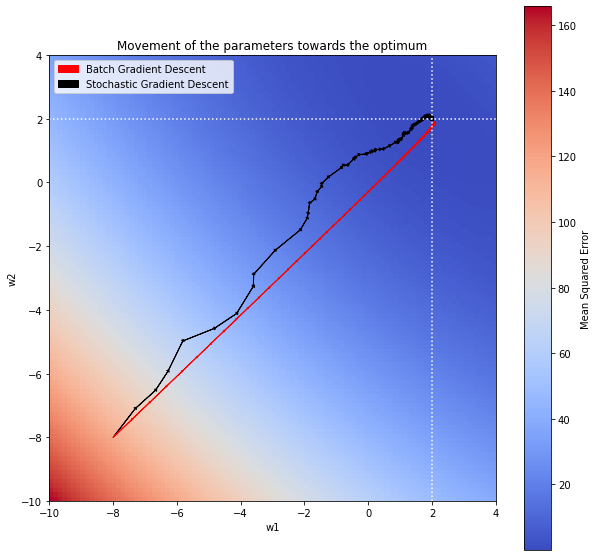

In [15]:
def plot_gradient_path(x_left = -10, x_right = 10, y_down = -10, y_up = 10, dataset = 1):
    w1_grid = np.linspace(x_left, x_right, 100)
    w2_grid = np.linspace(y_down, y_up, 100)

    EE = np.zeros((len(w1_grid),len(w2_grid)))

    for i,w1 in enumerate(w1_grid):
        for j,w2 in enumerate(w2_grid):
            if dataset == 1:
                y_preds = forward(w1, w2, X)
            else:
                y_preds = forward2(w1, w2, X)

            e = y - y_preds
            e2 = np.mean(e**2)
            EE[i,j] = e2

    plt.figure(figsize=(10,10))
    plt.imshow(EE, extent=(x_left,x_right,y_down,y_up), interpolation='nearest', origin='lower', cmap ="coolwarm")
    plt.colorbar(label = 'Mean Squared Error')

    plt.axvline(w1_true, color='w',ls=':')
    plt.axhline(w2_true, color='w',ls=':')

    for i in range(len(w1_path) - 1):
        #plt.plot(w1_path[i], w2_path[i],'.r')
        dx = w1_path[i+1] - w1_path[i]
        dy = w2_path[i+1] - w2_path[i]
        plt.arrow(w1_path[i], w2_path[i], dx , dy, head_width=0.1, head_length=0.05, fc='k', ec='k')

    for i in range(len(w1_path_batch)-1):
        dx = w1_path_batch[i+1] - w1_path_batch[i]
        dy = w2_path_batch[i+1] - w2_path_batch[i]
        plt.arrow(w1_path_batch[i], w2_path_batch[i], dx , dy, head_width=0.05, head_length=0.05, fc='k', ec='r')

    plt.title('Movement of the parameters towards the optimum')
    red_patch = mpatches.Patch(color='red', label='Batch Gradient Descent')
    black_patch = mpatches.Patch(color='black', label='Stochastic Gradient Descent')
    plt.legend(handles=[red_patch, black_patch])
    plt.xlabel('w1')
    plt.ylabel('w2')

    plt.show()

plot_gradient_path(x_left = -10, x_right = 4, y_down = -10, y_up = 4)

### Dataset 2

### Gradient Equations and Update Rule
$\hat{y_i} = w_1^3x_{i1} - w_1w_2^2x_{i2}$
<br>
$L = \frac{1}{2} \sum_i (y_i - \hat{y}_i)^2$ 
<br>

repeat:

$\frac{\partial{L}}{\partial{w_1}} = \sum_i (y_i - \hat{y_i})(-3w_1^2x_{i1} + w_2^2x_{i2})$
<br>
$\frac{\partial{L}}{\partial{w_2}} = \sum_i (y_i - \hat{y_i})(2w_1w_2x_{i2})$


$w_1^{(t+1)} = w_1^{(t)} - \alpha \frac{\partial{L}}{\partial{w_1}}$ 
<br>
$w_2^{(t+1)} = w_2^{(t)} - \alpha \frac{\partial{L}}{\partial{w_2}}$

In [16]:
def train2(X, y, batch_size = 100, lr = 0.001, epochs = 2, w1_init = 0.5, w2_init =0.5):
    
    
    w1 = w1_init #np.random.rand()
    w2 = w2_init #np.random.rand()
    print('initial parameter values:', 'w1:' , w1, 'w2:', w2)
    
    w1_path = [w1]
    w2_path = [w2]
    
    data_size = len(y)
    errors = []
    param_path = []
    grads_w1 = []
    grads_w2 = []

    for i in range(epochs):
        
        start_index = 0
        batch_errors = 0
        while start_index < data_size :
            
            X_batch, y_batch = get_batch(X, y, start_index, batch_size)
            
            y_pred = forward2(w1, w2, X_batch)
            
            dw1, dw2 = compute_gradient2(y_batch, X_batch, w1, w2)
            grads_w1.append(dw1)
            grads_w2.append(dw2)

            w1 += -lr*dw1
            w2 += -lr*dw2
            
            w1_path.append(w1)
            w2_path.append(w2)

            batch_errors += np.sum((y_batch - y_pred)**2)

            start_index = start_index + batch_size
            
        errors.append(batch_errors/data_size)
    
    print('parameter values after training:', 'w1:' , w1, 'w2:', w2)
    return errors, w1, w2, w1_path, w2_path, grads_w1, grads_w2

initial parameter values: w1: 0.5 w2: 0.5
parameter values after training: w1: 2.0 w2: 2.0
initial parameter values: w1: 0.5 w2: 0.5
parameter values after training: w1: 1.9999999999999993 w2: 1.9999999999999991


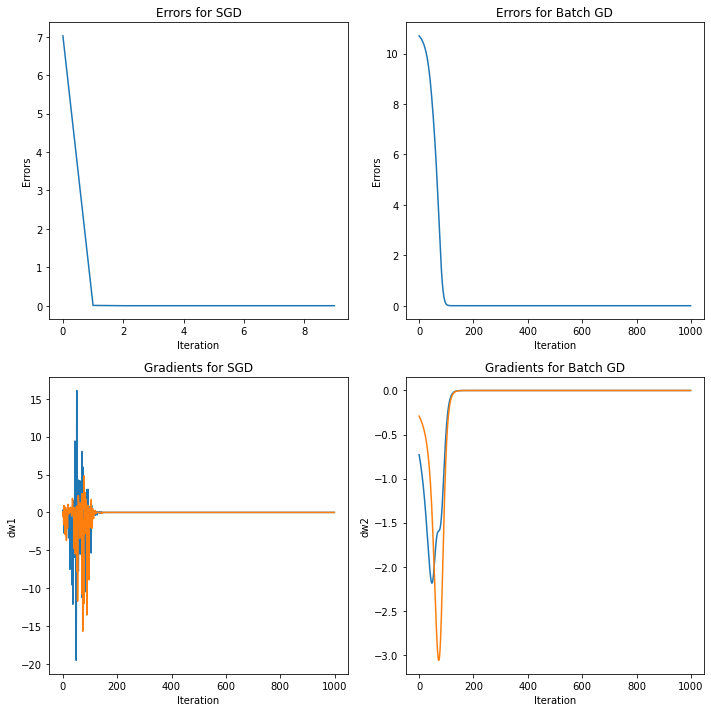

In [17]:
X, y, w1_true, w2_true = create_data2(100)
errors, w1, w2, w1_path, w2_path, grads_w1, grads_w2 = train2(X, y, batch_size = 1, lr = 0.01, epochs = 10, 
                                                              w1_init = 0.5, w2_init = 0.5 )

errors_batch, w1, w2, w1_path_batch, w2_path_batch, grads_w1_batch, grads_w2_batch = train2(X, y, batch_size = 100, 
                                                                lr = 0.01, epochs = 1000, w1_init = 0.5, w2_init =0.5)


def plot_errors_and_grads():
    f, axs = plt.subplots(2,2,figsize=(10,10))

    axs[0,0].plot(errors)
    axs[0,0].set_title('Errors for SGD')
    axs[0,0].set_xlabel('Iteration')
    axs[0,0].set_ylabel('Errors')

    axs[0,1].plot(errors_batch)
    axs[0,1].set_title('Errors for Batch GD')
    axs[0,1].set_xlabel('Iteration')
    axs[0,1].set_ylabel('Errors')


    axs[1,0].plot(grads_w1)
    axs[1,0].plot(grads_w2)
    axs[1,0].set_title('Gradients for SGD')
    axs[1,0].set_xlabel('Iteration')
    axs[1,0].set_ylabel('dw1')

    axs[1,1].plot(grads_w1_batch)
    axs[1,1].plot(grads_w2_batch)
    axs[1,1].set_title('Gradients for Batch GD')
    axs[1,1].set_xlabel('Iteration')
    axs[1,1].set_ylabel('dw2')


    plt.tight_layout()
    plt.show()

plot_errors_and_grads()

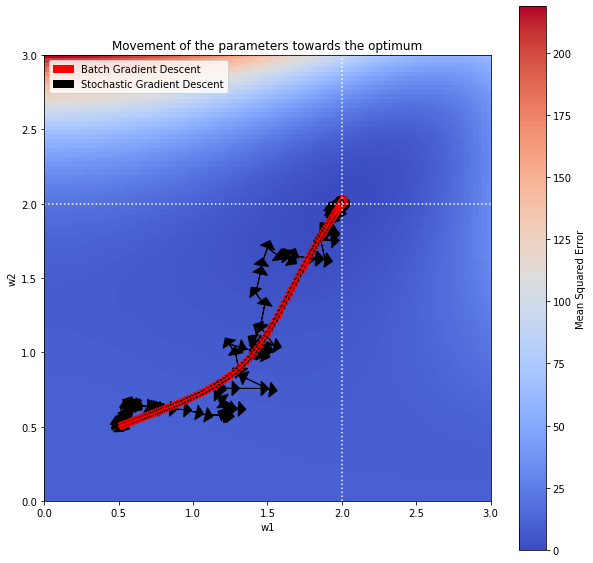

In [18]:
plot_gradient_path(x_left =0, x_right = 3, y_down = 0, y_up = 3, dataset = 2)

#### What if we did not have a good initial values for the parameters?

initial parameter values: w1: -5 w2: -5
parameter values after training: w1: nan w2: nan
initial parameter values: w1: -5 w2: -5
parameter values after training: w1: nan w2: nan


c:\users\urasv\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in multiply
  app.launch_new_instance()
c:\users\urasv\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in multiply
c:\users\urasv\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in square
c:\users\urasv\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in subtract
  import sys
c:\users\urasv\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in add
  app.launch_new_instance()
c:\users\urasv\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
c:\users\urasv\appdata\local\

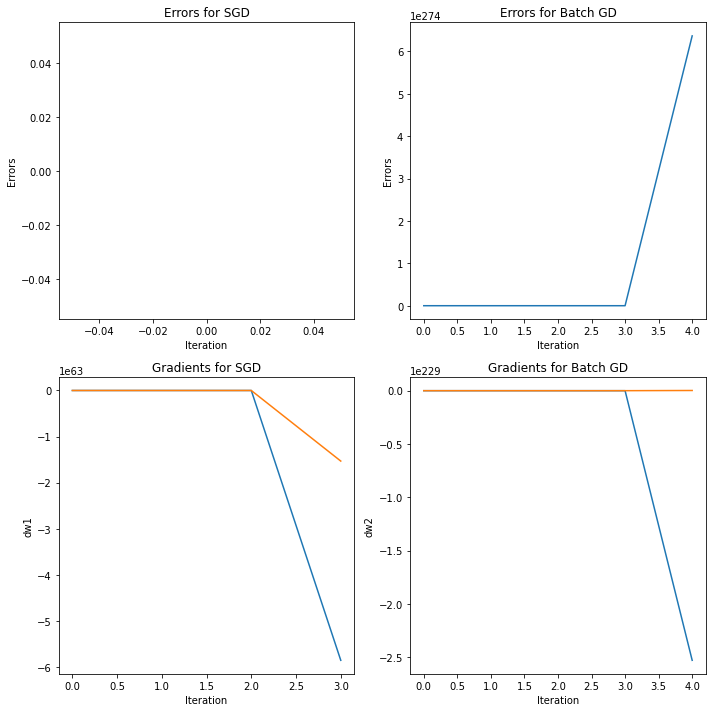

In [19]:
errors, w1, w2, w1_path, w2_path, grads_w1, grads_w2 = train2(X, y, batch_size = 1, lr = 0.01, epochs = 10, 
                                                              w1_init = -5, w2_init = -5)

errors_batch, w1, w2, w1_path_batch, w2_path_batch, grads_w1_batch, grads_w2_batch = train2(X, y, batch_size = 100, 
                                                                lr = 0.01, epochs = 1000, w1_init = -5, w2_init = -5)

plot_errors_and_grads()

#### If we inspect the gradients, we can see that they are doing very large oscillations and overshooting

In [20]:
grads_w1

[515.1678939644027,
 -106157.45001925952,
 645983029360466.8,
 -5.852829798800576e+63,
 inf,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 

### Gradient Descent with momentum and learning rate decay

### We now have a different update rule:

repeat:

$v_1^{(t + 1)} = \gamma v_1^{(t)} + \frac{\partial{L}}{\partial{w_1}}$
<br>
$v_2^{(t + 1)} = \gamma v_2^{(t)} + \frac{\partial{L}}{\partial{w_2}}$

<br>
$w_1^{(t+1)} = w_1^{(t)} - \alpha^{(t)}v_1^{(t+1)}$ 
<br>
$w_2^{(t+1)} = w_2^{(t)} - \alpha^{(t)}v_2^{(t+1)}$
<br>

update learning rate after each parameter update:
<br>
$\alpha^{(t+1)} = \beta\alpha^{(t)}$

In [21]:
def train_with_momentum(X, y, batch_size = 100, lr = 0.001, epochs = 2, w1_init = 0.5, w2_init =0.5, 
                        gamma = 0.99, lr_decay = 0.9):
    
    w1 = w1_init #np.random.rand()
    w2 = w2_init #np.random.rand()
    print('initial parameter values:', 'w1:' , w1, 'w2:', w2)
    
    w1_path = [w1]
    w2_path = [w2]
    
    data_size = len(y)
    errors = []
    param_path = []
    grads_w1 = [0]
    grads_w2 = [0]

    for i in range(epochs):
        
        start_index = 0
        batch_errors = 0
        while start_index < data_size :
    
            X_batch, y_batch = get_batch(X, y, start_index, batch_size)
            
            y_pred = forward2(w1, w2, X_batch)
            
            dw1, dw2 = compute_gradient2(y_batch, X_batch, w1, w2)
            
            dw1 = gamma*grads_w1[-1] + (1-gamma)*dw1
            dw2 = gamma*grads_w2[-1] + (1-gamma)*dw2
            
            grads_w1.append(dw1)
            grads_w2.append(dw2)

            w1 += -lr*dw1
            w2 += -lr*dw2
            
            w1_path.append(w1)
            w2_path.append(w2)

            batch_errors += np.sum((y_batch - y_pred)**2)/data_size

            start_index = start_index + batch_size
            lr = lr * (1-lr_decay)
            
        errors.append(batch_errors)
        
    
    print('parameter values after training:', 'w1:' , w1, 'w2:', w2)
    return errors, w1, w2, w1_path, w2_path, grads_w1, grads_w2

initial parameter values: w1: -5 w2: -5
parameter values after training: w1: 1.3651261053800383 w2: 2.2214731441372297
initial parameter values: w1: -5 w2: -5
parameter values after training: w1: 0.34233898733991813 w2: 4.192654177277553


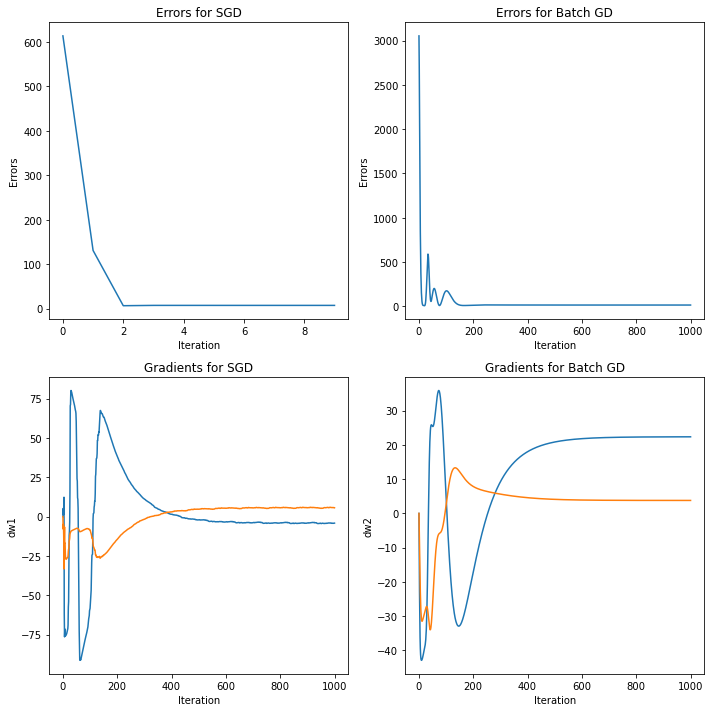

In [22]:
errors, w1, w2, w1_path, w2_path, grads_w1, grads_w2 = train_with_momentum(X, y, batch_size = 1, lr = 0.01, epochs = 10, 
                                                              w1_init = -5, w2_init = -5, lr_decay= 0.02)

errors_batch, w1, w2, w1_path_batch, w2_path_batch, grads_w1_batch, grads_w2_batch = train_with_momentum(X, y, batch_size = 100, 
                                                        lr = 0.01, epochs = 1000, w1_init = -5, w2_init =-5, lr_decay = 0.02)

plot_errors_and_grads()

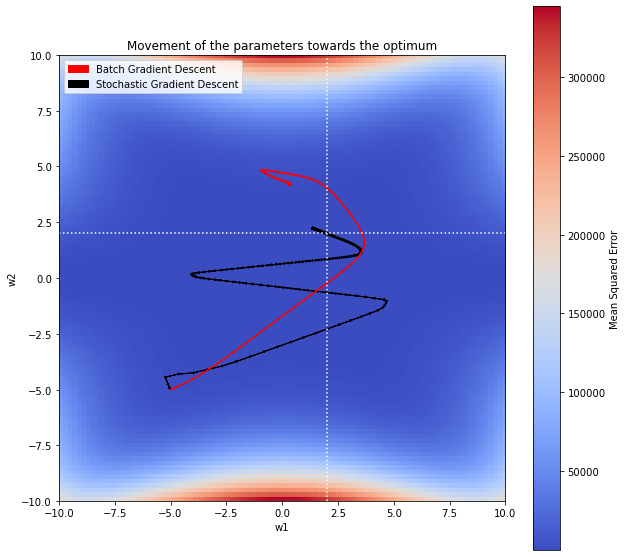

In [23]:
plot_gradient_path(x_left =-10, x_right = 10, y_down = -10, y_up = 10, dataset = 2)